In [1]:
using Pkg

Pkg.activate("ermacpr25")
Pkg.instantiate()

  Activating project at `~/personal/working/minicurso-empacotamento/ermacpr25`


In [2]:
using LinearAlgebra, Plots

In [93]:
include("ermacpr25/src/ermacpr25.jl")

desenha_solucao_cq (generic function with 2 methods)

# O que é um problema de empacotamento?

## Uma definição simples

Em problemas de empacotamento, desejamos **alocar** objetos em **contêineres**.

Problemas de empacotamento aparecem em diversas áreas

  - Alocação de objetos em caixas
  - Alocação de objetos em caminhões
  - Cortes de peças
  - Simulações com proteínas
  - Organização de ambientes
  - Muito, muito mais

## Mais informações

  - HIFI, Mhand; M′ HALLAH, Rym. **A literature review on circle and sphere packing problems: Models and methodologies**. Advances in Operations Research, v. 2009, n. 1, p. 150624, 2009
  - LEAO, Aline AS et al. **Irregular packing problems: A review of mathematical models**. European Journal of Operational Research, v. 282, n. 3, p. 803-822, 2020
  - E. Spetch, **Packomania**, `http://packomania.com/`, 2025

## Empacotamento de círculos e esferas

![circle-packing](figures/circle-packing.jpeg)

![sphere-packing](figures/sphere-packing.jpeg)

### Sala Planejada

![sala-planejada](figures/sala-planejada.png)

### Empacotamento de triângulos

![triangle-packing](figures/triangle-packing.png)

### Empacotamento em 2 níveis

![bilevel](figures/padeiro1.jpg)

### Polígonos regulares ou irregulares

![irregular](figures/irregular-packing.jpg)

### Definição do problema

  - Temos um conjunto com $N$ itens
      - Círculos
      - Quadrados
      - Polígonos
      - Esferas
      - Elipsoides
      - **Triângulos**

  - Temos um contêiner
      - Círculos, esferas
      - Quadrados, cubos
      - Retângulos, _strips_
      - Polígonos

  - Devemos **alocar** o máximo de itens no contêiner
  - Devemos encontrar o "menor" contêiner que os contém
  - Podemos ter objetos idênticos ou não
  - Não pode haver **sobreposição**

$$
\begin{array}{ll}
\min & \text{área, perímetro, nada \dots} \\
\text{suj. a} & \text{Não sobreposição} \\
& \text{Pertinência} \\
\end{array}
$$

# Sobreposição de dois círculos?

Modifique os valores abaixo e veja o valor da sobreposição

In [4]:
c1 = [1, 1]
r1 = 1

c2 = [1, 2]
r2 = 1

s = norm(c2 - c1) - (r1 + r2)

println("Sobreposição = $s")

Sobreposição = -1.0


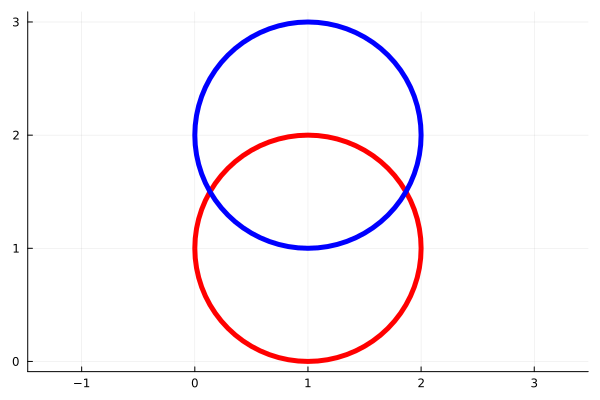

In [5]:
plot(circulo(c1, r1), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)
plot!(circulo(c2, r2), c=false, lc=:blue, lw=5, label=false)

# Sobreposição entre quadrados

## Sem rotação

In [6]:
v1 = [1, 1]
l1 = 2

v2 = [2, 2]
l2 = 2

overlap1 = max(0.0, v1[1] + l1 / 2 - (v2[1] - l2 / 2)) * 
           max(0.0, v2[1] + l2 / 2 - (v1[1] - l1 / 2)) * 
           max(0.0, v1[2] + l1 / 2 - (v2[2] - l2 / 2)) * 
           max(0.0, v2[2] + l2 / 2 - (v1[2] - l1 / 2))

overlap2 = max(0.0, v1[1] + l1 / 2 - (v2[1] - l2 / 2))^2 *
           max(0.0, v2[1] + l2 / 2 - (v1[1] - l1 / 2))^2 * 
           max(0.0, v1[2] + l1 / 2 - (v2[2] - l2 / 2))^2 * 
           max(0.0, v2[2] + l2 / 2 - (v1[2] - l1 / 2))^2

println("Medida de sobreposição: $overlap1")
println("Medida de sobreposição (diferenciável): $overlap2")

Medida de sobreposição: 9.0
Medida de sobreposição (diferenciável): 81.0


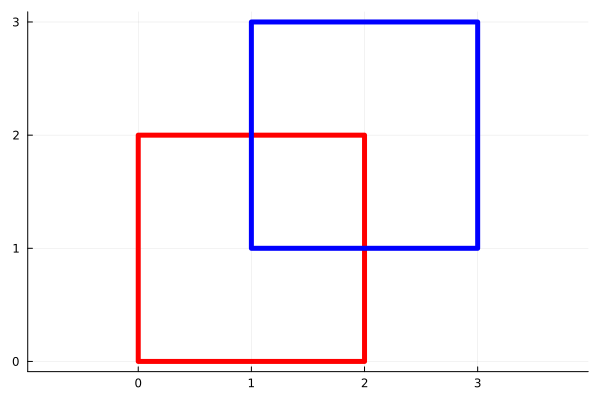

In [7]:
plot(quadrado(v1, l1), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)
plot!(quadrado(v2, l2), c=false, lc=:blue, lw=5, label=false, aspect_ratio=true)

## Com rotação

Quando ocorre rotação, a medida simplificada de sobreposição pode não ser correta.

In [166]:
v1 = [1, 0]
l1 = 2
θ1 = π / 4

v2 = [2, 2]
l2 = 3
θ2 = π / 2

1.5707963267948966

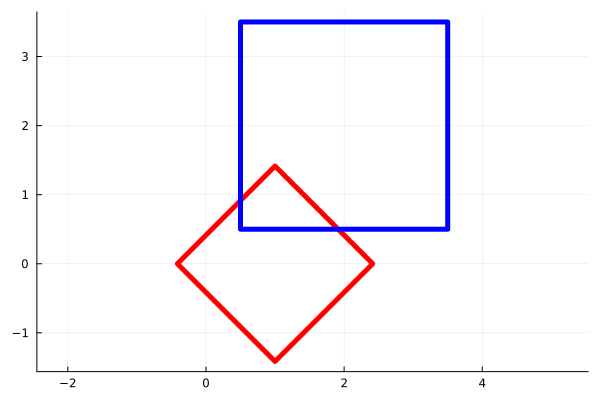

In [167]:
plot(quadrado(v1, l1, θ1), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)
plot!(quadrado(v2, l2, θ2), c=false, lc=:blue, lw=5, label=false, aspect_ratio=true)

A ideia é

  - Assumir que existe um **quadrado base** que é então rotacionado e transladado
  - Aplicar a transformação inversa do quadrado $i$ no quadrado $j$
  - Verificar os vértices transformados do quadrado $j$ no quadrado base 

In [178]:
quadrado_base(l) = [[-l/2 -l/2], [l/2 -l/2], [l/2 l/2], [-l/2 l/2], [0, 0],
                    [0, l/2], [0, -l/2], [l/2, 0], [-l/2, 0]]

quadrado_base (generic function with 1 method)

In [163]:
# Sobreposição com um quadrado SEM rotação
medida_dentro_quad(v, l, p) = max(0.0, p[1] - (v[1] - l / 2)) * 
                              max(0.0, v[1] + l / 2 - p[1]  ) *
                              max(0.0, p[2] - (v[2] - l / 2)) *
                              max(0.0, v[2] + l / 2 - p[2]  )

medida_dentro_quad (generic function with 1 method)

In [164]:
rotaciona_desloca(v, θ, p) = [v[1] + cos(θ) * p[1] - sin(θ) * p[2],
                              v[2] + sin(θ) * p[1] + cos(θ) * p[2]]

rotaciona_desloca_inv(v, θ, p) = [cos(-θ) * (p[1] - v[1]) - sin(-θ) * (p[2] - v[2]),
                                  sin(-θ) * (p[1] - v[1]) + cos(-θ) * (p[2] - v[2])]

rotaciona_desloca_inv (generic function with 1 method)

In [168]:
overlap3 = sum(medida_dentro_quad([0,0], l1, rotaciona_desloca_inv(v1, θ1, rotaciona_desloca(v2, θ2, p)))
               for p in quadrado_base(l2)) +
           sum(medida_dentro_quad([0,0], l2, rotaciona_desloca_inv(v2, θ2, rotaciona_desloca(v1, θ1, p)))
               for p in quadrado_base(l1))

println("Medida de sobreposição com rotação: $overlap3")

Medida de sobreposição com rotação: 2.883567811865475


Para **retângulos** a estratégia dos vértices **não funciona**. É necessário adicionar mais pontos, conhecidos como **sentinelas**

> E. G. Birgin, J. M. Martínez, W. F. Mascarenhas and D. P. Ronconi, Method of Sentinels for Packing Items within Arbitrary Convex Regions, Journal of the Operational Research Society 57, pp. 735-746, 2006. 

> W. F. Mascarenhas and E. G. Birgin, Using sentinels to detect intersections of convex and nonconvex polygons, Computational & Applied Mathematics 29, pp. 247-267, 2010. 

Para polígonos com ângulos menores que $\pi / 2$, não existe um número finito de sentinelas.

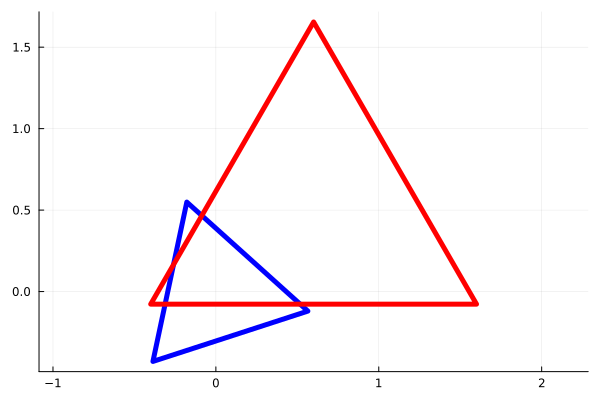

In [14]:
bc1 = [0, 0]
l1  = 1.0
θ1  = π / 10

bc2 = [0.6, 0.5]
l2 = 2.0
θ2 = 0.0

plot(triangulo_eq(bc1, θ1, l1), c=false, lc=:blue, lw=5, label=false, aspect_ratio=true)
plot!(triangulo_eq(bc2, θ2, l2), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)

# Alocação de itens

## Círculos em regiões circulares

Para verificar se um círculo de centro $(x, y)$ e raio $r$ encontra-se dentro de uma região circular de raio $R$, assumimos que ela encontra-se na origem e verificamos se
$$
x^2 + y^2 \le (R - r)^2
$$

In [23]:
c1 = [1, 0.5]
r1 = 1

R = 3

alocacao_cc = c1[1]^2 + c1[2]^2 - (R - r1)^2

println("Alocação no círculo: $alocacao_cc")

Alocação no círculo: -2.75


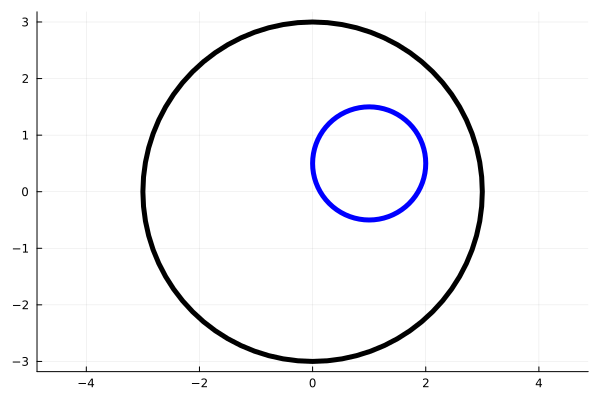

In [22]:
plot(circulo(c1, r1), c=false, lc=:blue, lw=5, label=false, aspect_ratio=true)
plot!(circulo([0, 0], R), c=false, lc=:black, lw=5, label=false, aspect_ratio=true)

## Círculos em retângulos

A alocação de um círculo com centro $(x, y)$ e raio $r$ em regiões retangulares $W \times L$ é dada por restrições **de caixa**:
$$
\begin{split}
r \le x & \le L - r \\
r \le y & \le W - r \\
\end{split}
$$

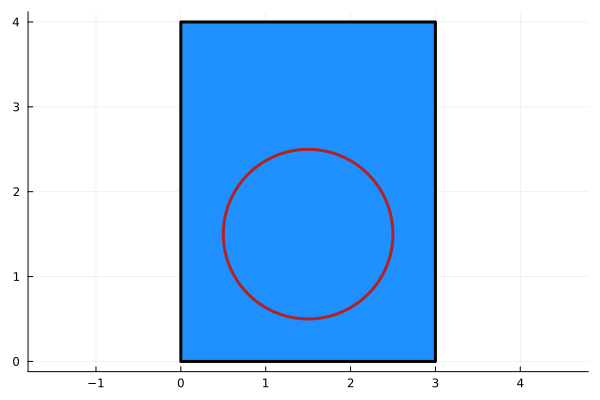

In [45]:
c1 = [1.5, 1.5]
r1 = 1

W = 3
L = 4

plot(caixa(L, W), c=:dodgerblue, lc=:black, lw=3, label=false, aspect_ratio=true)
plot!(circulo(c1, r1), c=false, lc=:firebrick, lw=3, label=false, aspect_ratio=true)


## Círculos em polígonos convexos quaisquer

-2.3768943743823394
-2.0
-1.3377223398316218
-1.7639320225002102


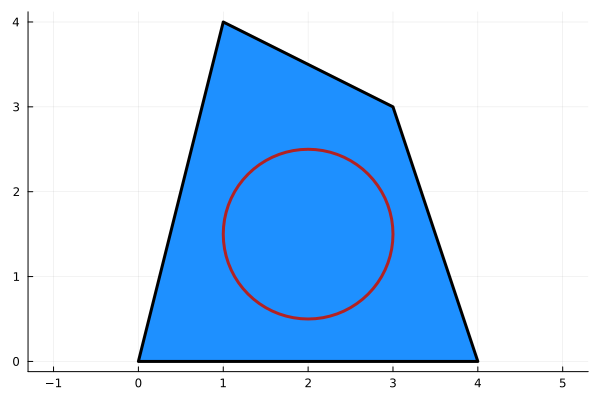

In [55]:
c1 = [2, 1.5]
r1 = 1.0

poligono_qualquer = [0 0; 4 0; 3 3; 1 4]

w = poligono_qualquer[end, :]

for v in eachrow(poligono_qualquer)

    n = [(v[2] - w[2]), -(v[1] - w[1])]

    println(dot(n, c1 + r1 * n / norm(n)) - dot(n, w))

    w = v

end

plot(poligono(poligono_qualquer), c=:dodgerblue, lc=:black, lw=3, label=false, aspect_ratio=true)
plot!(circulo(c1, r1), c=false, lc=:firebrick, lw=3, label=false, aspect_ratio=true)


## Polígonos convexos em círculos

## Polígonos convexos em polígonos convexos

# Problemas interessantes

In [58]:
using JuMP, Ipopt

## Problema 1

Cabem $10$ círculos de raio 1 em um quadrado $7 \times 7$?

$$
\begin{array}{llr}
\min & \text{nada} & \\
\text{s. a} & (x_i - x_j)^2 + (y_i - y_j)^2 \ge 4 & 1 \le i < j < 10 \\
& 1 \le x_i \le 6 & i = 1, \dots, 10 \\
& 1 \le y_i \le 6 & i = 1, \dots, 10 
\end{array}
$$

In [79]:
model = Model(Ipopt.Optimizer)

@variable(model, 1 <= xC[i = 1:10] <= 6, start=7*rand())
@variable(model, 1 <= yC[i = 1:10] <= 6, start=7*rand())

@NLconstraint(model, [i = 1:10, j = i + 1:10], (xC[i] - xC[j])^2 + (yC[i] - yC[j])^2 >= 4)

@objective(model, Min, 0)

optimize!(model)

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      180
Number of nonzeros in Lagrangian Hessian.............:      270

Total number of variables............................:       20
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       45
        inequality constraints with only lower bounds:       45
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 3.03e+00 1.50e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

In [80]:
println("""
termination_status = $(termination_status(model))
primal_status      = $(primal_status(model))
objective_value    = $(objective_value(model))
""")

termination_status = LOCALLY_SOLVED
primal_status      = FEASIBLE_POINT
objective_value    = 0.0



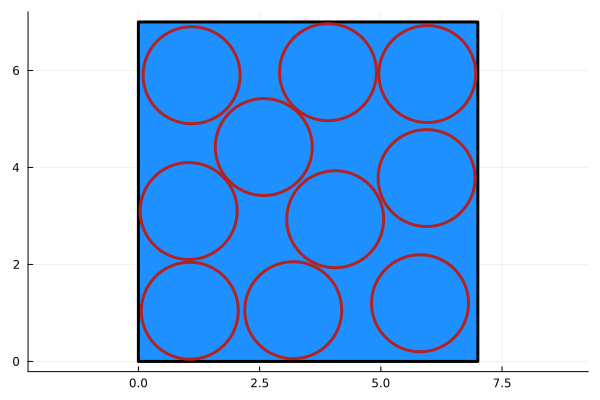

In [81]:
desenha_solucao_cq([1 for i = 1:10], value.(xC), value.(yC), 7, 7)

## Problema 1 - outra formulação

Cabem $10$ círculos de raio 1 em um quadrado $7 \times 7$?

$$
\begin{array}{llr}
\min & \sum_{i < j} \max\{0, 4 - (x_i - x_j)^2 - (y_i - y_j)^2\}^2 & \\
\text{s. a} & 1 \le x_i \le 6 & i = 1, \dots, 10 \\
& 1 \le y_i \le 6 & i = 1, \dots, 10 
\end{array}
$$

Esta versão é adequada para algoritmos que lidam bem com restrições de caixa.

In [85]:
model = Model(Ipopt.Optimizer)

@variable(model, 1 <= xC[i = 1:10] <= 6, start=7*rand())
@variable(model, 1 <= yC[i = 1:10] <= 6, start=7*rand())

@objective(model, Min, sum(max(0, 4 - (xC[i] - xC[j])^2 - (yC[i] - yC[j])^2)^2 for i = 1:10, j = i + 1:10))

optimize!(model)

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      210

Total number of variables............................:       20
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  5.0258089e+01 0.00e+00 1.20e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

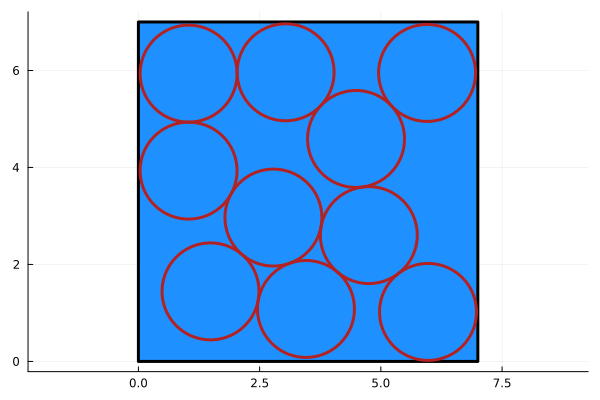

In [86]:
desenha_solucao_cq([1 for i = 1:10], value.(xC), value.(yC), 7, 7)

### Desafio

Você conseguiria alterar o(s) código(s) acima para lidar com um número $N$ arbitrário de círculos? E com raios diferentes?

## Problema 2

Qual o **menor** quadrado que contém 10 círculos?

$$
\begin{array}{llr}
\min & L & \\
\text{s. a} & (x_i - x_j)^2 + (y_i - y_j)^2 \ge 4 & 1 \le i < j < 10 \\
& 1 \le x_i \le L - 1 & i = 1, \dots, 10 \\
& 1 \le y_i \le L - 1 & i = 1, \dots, 10 
\end{array}
$$

In [89]:
model = Model(Ipopt.Optimizer)

L_inicial = (10 + 10 * rand()) * π

@variable(model, L, start=L_inicial)
@variable(model, 1 <= xC[i = 1:10], start=L_inicial*rand())
@variable(model, 1 <= yC[i = 1:10], start=L_inicial*rand())

@NLconstraint(model, [i = 1:10, j = i + 1:10], (xC[i] - xC[j])^2 + (yC[i] - yC[j])^2 >= 4)

@constraint(model, [i = 1:10], xC[i] <= L - 1)
@constraint(model, [i = 1:10], yC[i] <= L - 1)

@objective(model, Min, L)

optimize!(model)

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      220
Number of nonzeros in Lagrangian Hessian.............:      270

Total number of variables............................:       21
                     variables with only lower bounds:       20
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       65
        inequality constraints with only lower bounds:       45
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       20

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.6156848e+01 0.00e+00 1.73e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

In [91]:
println("""
termination_status = $(termination_status(model))
primal_status      = $(primal_status(model))
objective_value    = $(objective_value(model))
""")

termination_status = LOCALLY_SOLVED
primal_status      = FEASIBLE_POINT
objective_value    = 6.7602788070599615



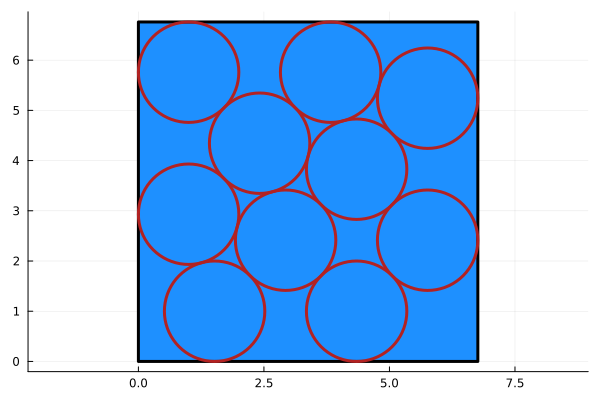

In [94]:
desenha_solucao_cq([1 for i = 1:10], value.(xC), value.(yC), value(L))

## Problema 3

Consegumos colocar $N=6$ quadrados de lado $\ell = 1$ em um círculo de raio $R=2$?

$$
\begin{array}{llr}
\min & \sum_{i \ne j}  \max\{0, P^{-1}(P_j(v)) + \ell / 2\}^2 \cdot \max\{0, \ell / 2 - P^{-1}(P_j(v))\}^2 \cdot & \\
& \max\{0, P^{-1}(P_j(v)) + \ell / 2\}^2 \cdot \max\{\ell / 2 - P^{-1}(P_j(v))\}^2 & \\[0.5cm]
\text{s. a} 
& \big(P_i(x_i - \ell / 2)\big)^2 + \big(P_i(y_i - \ell / 2)\big)^2 \le R^2 & i = 1, \dots, N \\
& \big(P_i(x_i + \ell / 2)\big)^2 + \big(P_i(y_i - \ell / 2)\big)^2 \le R^2 & i = 1, \dots, N \\
& \big(P_i(x_i + \ell / 2)\big)^2 + \big(P_i(y_i + \ell / 2)\big)^2 \le R^2 & i = 1, \dots, N \\
& \big(P_i(x_i - \ell / 2)\big)^2 + \big(P_i(y_i + \ell / 2)\big)^2 \le R^2 & i = 1, \dots, N \\
\end{array}
$$

onde $P_i$ é a rotação seguida do deslocamento do **quadrado base** para o quadrado $i$ e $P_i^{-1}$ sua inversa.

In [202]:
model = Model(Ipopt.Optimizer)

R_inicial = 2
N = 5
ℓ = 1

@variable(model, xQ[i = 1:N], start=-R_inicial + 2 * R_inicial * rand())
@variable(model, yQ[i = 1:N], start=-R_inicial + 2 * R_inicial * rand())
@variable(model, θ[i = 1:N], start = 2 * π * rand())

q_base = quadrado_base(ℓ)
K = length(q_base)

px_i = @expression(model, [i = 1:N, k = 1:K], xQ[i] + cos(θ[i]) * q_base[k][1] - sin(θ[i]) * q_base[k][2])
py_i = @expression(model, [i = 1:N, k = 1:K], yQ[i] + sin(θ[i]) * q_base[k][1] + cos(θ[i]) * q_base[k][2])

px_im1 = @expression(model, [i = 1:N, j = 1:N, k = 1:K], cos(- θ[i]) * (px_i[j, k] - xQ[i]) - sin(- θ[i]) * (py_i[j, k] - yQ[i]))
py_im1 = @expression(model, [i = 1:N, j = 1:N, k = 1:K], sin(- θ[i]) * (px_i[j, k] - xQ[i]) + cos(- θ[i]) * (py_i[j, k] - yQ[i]))

@constraint(model, [i = 1:N, k = 1:K], px_i[i, k]^2 + py_i[i, k]^2 <= R_inicial^2)

@objective(model, Min, sum( max(0.0, px_im1[i, j, k] + ℓ/2)^2 *
                            max(0.0, - px_im1[i, j, k] + ℓ/2)^2 *
                            max(0.0, py_im1[i, j, k] + ℓ/2)^2 *
                            max(0.0, - py_im1[i, j, k] + ℓ/2)^2 for i = 1:N, j = 1:N, k = 1:K if i != j))

optimize!(model)

In [203]:
println("""
termination_status = $(termination_status(model))
primal_status      = $(primal_status(model))
objective_value    = $(objective_value(model))
""")

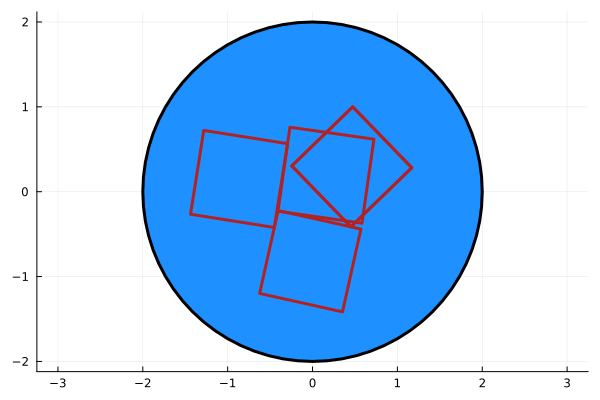

In [204]:
desenha_solucao_qc(ℓ, value.(xQ), value.(yQ), value.(θ), R_inicial)